In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/AI_Course/Math_AI/Code

/content/drive/MyDrive/AI_Course/Math_AI/Code


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.preprocessing as pre
import pandas as pd
import scipy.stats

In [ ]:
iris = datasets.load_iris()
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [ ]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
U, S, V = np.linalg.svd(iris_df)

In [ ]:
print(f"U matrix has {U.shape[0]} rows and {U.shape[1]} columns")
print(pd.DataFrame(U).head())

U matrix has 150 rows and 150 columns
        0         1         2    ...       147       148       149
0 -0.061617  0.129611  0.002139  ... -0.093434 -0.095739 -0.080855
1 -0.058071  0.111020  0.070672  ...  0.036904 -0.031540  0.013095
2 -0.056763  0.117966  0.004343  ...  0.030662  0.195315  0.135699
3 -0.056653  0.105308  0.005925  ...  0.085419  0.097719 -0.040469
4 -0.061230  0.131090 -0.031881  ...  0.001071 -0.007323 -0.004500

[5 rows x 150 columns]


In [ ]:
num_sv_iris = np.arange(1, S.size + 1)
cum_var_explained = [np.sum(np.square(S[:num])) / np.sum(np.square(S)) for num in num_sv_iris]

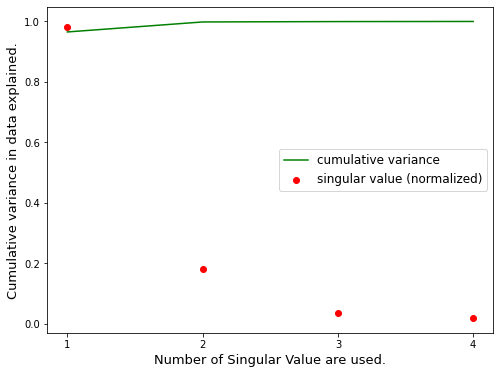

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.subplots(1)
ax.plot(num_sv_iris, cum_var_explained, c = 'g', label = 'cumulative variance')
ax.scatter(num_sv_iris, pre.normalize(S.reshape(1, -1)), c = 'r', label = 'singular value (normalized)')
ax.legend(loc = 'right', fontsize = 12, scatterpoints = 1)
ax.set_xticks(num_sv_iris)
ax.set_xlabel("Number of Singular Value are used.", fontsize = 13)
ax.set_ylabel("Cumulative variance in data explained.", fontsize = 13)
plt.show()

## ***Dimension Reduction***
Judging from the curve representing cumulative variance explained in the figure above, we can see that:
* With 1 Singular value, about 96.5% of the variance of X can be explained.
* With 2 Singular value, that number goes up to 99.8%.

Since graphing the IRIS dataset in 1D wouldn't be all that interesting (just dot on a line segment), let's try using the first 2 singular values to represent the data on the x-axis and y-axis, respectively.

In [ ]:
setosa_indx = np.where(iris.target == 0)[0]
versicolor_indx = np.where(iris.target == 1)[0]
virginca_indx = np.where(iris.target == 2)[0]

setosa_X = U[setosa_indx, 0]
setosa_Y = U[setosa_indx, 1]

versicolor_X = U[versicolor_indx, 0]
versicolor_Y = U[versicolor_indx, 1]

virginca_X = U[virginca_indx, 0]
virginca_Y = U[virginca_indx, 1]

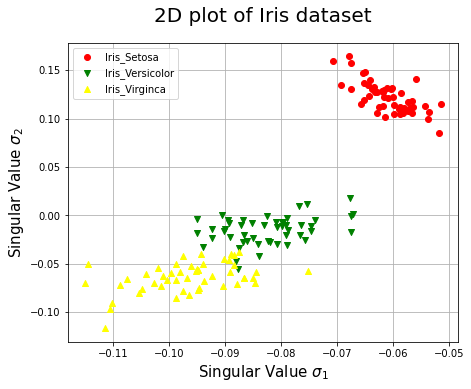

In [ ]:
fig = plt.figure(figsize = (7, 5.5))
ax = fig.add_subplot(111)

plt.scatter(setosa_X, setosa_Y, marker = 'o', color = 'red', label = 'Iris_Setosa', zorder = 1000)
plt.scatter(versicolor_X, versicolor_Y, marker = 'v', color = 'green', label = 'Iris_Versicolor', zorder = 1000)
plt.scatter(virginca_X, virginca_Y, marker = '^', color = 'yellow', label = 'Iris_Virginca', zorder = 1000)

plt.legend(loc = 'upper left', scatterpoints = 1, fontsize = 10)

ax.set_xlabel(r'Singular Value $\sigma_{1}$', fontsize = 15)
ax.set_ylabel(r'Singular Value $\sigma_{2}$', fontsize = 15)
ax.set_title('2D plot of Iris dataset', fontsize = 20, y = 1.05)
plt.grid(zorder = 0.5)
plt.show()

# ***Principal Component Anlysis (PCA)***

In [ ]:
data = pd.read_csv("country_language.csv", header = 0)
data = data.astype(int)
data.head()

,Country,Language
0,2,1
1,3,1
2,4,5
3,3,1
4,4,5


In [ ]:
countries = ['Canada', 'USA', 'England', 'Italy', 'Switzerland']
languages = ['English', 'French', 'Spanish', 'German', 'Italian']

df = pd.crosstab(data.Country, data.Language)
df.index = countries
df.columns = languages
df

,English,French,Spanish,German,Italian
Canada,667,307,5,10,11
USA,739,29,192,4,36
England,807,69,40,34,50
Italy,25,9,12,13,941
Switzerland,13,214,19,648,106


In [ ]:
#   Normalize
P = df / df.sum().sum()
P.head()

,English,French,Spanish,German,Italian
Canada,0.1334,0.0614,0.0010,0.0020,0.0022
USA,0.1478,0.0058,0.0384,0.0008,0.0072
England,0.1614,0.0138,0.0080,0.0068,0.0100
Italy,0.0050,0.0018,0.0024,0.0026,0.1882
Switzerland,0.0026,0.0428,0.0038,0.1296,0.0212


In [ ]:
row_centroid = P.sum(axis = 1)
print(f"Row centroid(marginal frequentcy distribution over countries):\n\n{row_centroid}")

Row centroid(marginal frequentcy distribution over countries):

Canada         0.2
USA            0.2
England        0.2
Italy          0.2
Switzerland    0.2
dtype: float64


In [ ]:
row_centroid = P.sum(axis = 0)
print(f"Row centroid(marginal frequentcy distribution over languages):\n\n{row_centroid}")

Row centroid(marginal frequentcy distribution over languages):

English    0.4502
French     0.1256
Spanish    0.0536
German     0.1418
Italian    0.2288
dtype: float64


## ***Linear Regresion with SVD***


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

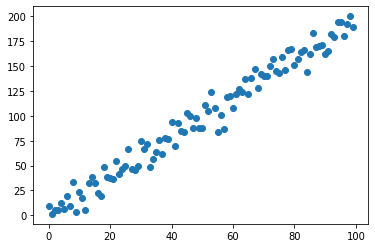

In [ ]:
n = 100
num = np.arange(n)

# add 1 column in the last of X to create X matrix
X = np.hstack((x.reshape(n, 1), np.ones((n, 1))))
Y = np.random.randn(n)*10 + 2*x
plt.scatter(num, Y);

In [ ]:
A = np.dot(X.T, X)
b = np.dot(X.T, Y)

U, S_diag, V = np.linalg.svd(A)
S = np.zeros((S_diag.size, S_diag.size))
np.fill_diagonal(S, S_diag)
S_inv = np.linalg.inv(S)

A_pseu = np.dot(V.T, np.dot(S_inv, U.T))

w = np.dot(A_pseu, b)
w

array([1.95983668, 0.64627055])

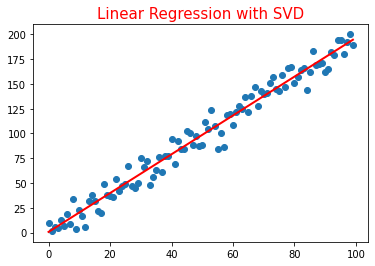

In [ ]:
plt.scatter(num, Y)
plt.plot(num, np.dot(X, w), c = 'r', linewidth = 2)
plt.title("Linear Regression with SVD", fontsize = 15, c = 'r')
plt.show()
plt.close()

In [ ]:
from sklearn import linear_model
ln_reg = linear_model.LinearRegression(fit_intercept = False)
ln_reg.fit(X, Y)
print('w calculated from sklearn: %s' %str(ln_reg.coef_))

w calculated from sklearn: [1.95983668 0.64627055]


## ***Image Compression***
### Use ***Truncate*** SVD Algorithm

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import sklearn.preprocessing as pre

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('seaborn-dark')

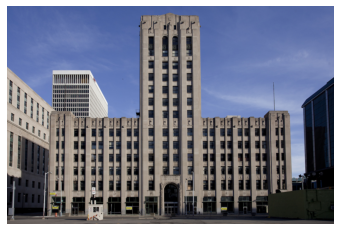

In [6]:
img = mpimg.imread('building.jpg')
plt.imshow(img, cmap = 'gray')
plt.axis("off")
plt.show()

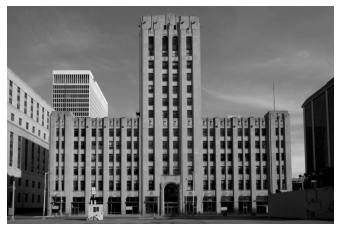

In [7]:
# Convert image to gray scale
gray = 0.2125 * img[:, :, 0] + 0.7154 * img[:, :, 1] + 0.0721 * img[:, :, 2]
plt.imshow(gray, cmap = 'gray')
plt.axis("off")
plt.show()

In [8]:
U, S, V = np.linalg.svd(gray)

In [11]:
V.shape

(1440, 1440)

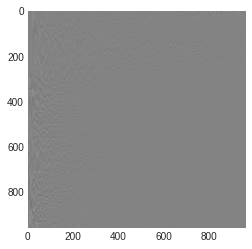

In [9]:
plt.imshow(U, cmap = 'gray')

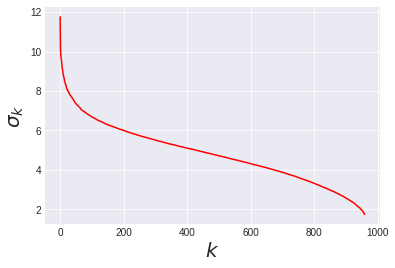

In [ ]:
#   Visualize k_val in S_diagonal according logarit
plt.plot(np.arange(S.size), np.log(S), c = 'r')
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\sigma_k$', fontsize = 20)
plt.grid()
plt.show()

In [ ]:
num_sigular = np.arange(1, S.size+1)
cum_var_explained = [np.sum(np.square(S[:i])) / np.sum(np.square(S)) for i in num_sigular]

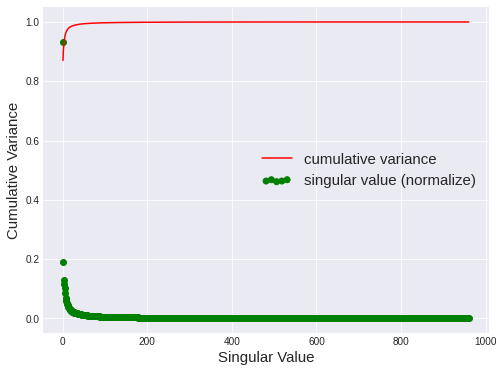

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.plot(num_sigular, cum_var_explained, c = 'r', label = 'cumulative variance')
ax.scatter(num_sigular, pre.normalize(S.reshape(1, -1)), c = 'green', label = 'singular value (normalize)')
ax.legend(loc = 'center right', scatterpoints = 5, fontsize = 15)
ax.set_xlabel("Singular Value", fontsize = 15)
ax.set_ylabel("Cumulative Variance", fontsize = 15)
# ax.set_xticks(num_sigular)
plt.grid()
plt.show()

In [ ]:
def approx_rank_k(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(np.dot(Uk, np.dot(np.diag(Sk), Vk)))

In [ ]:
A = []
K = [5, 50, 100]
for k in K:
    A.append(approx_rank_k(U, S, V, k))

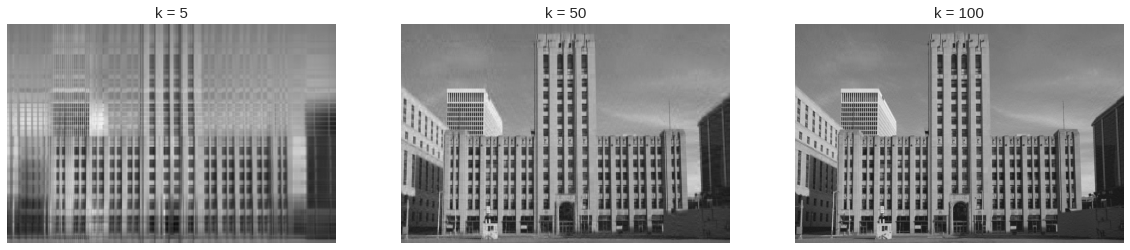

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 35))
for i in range(3):
    axs[i].imshow(A[i], cmap = 'gray')
    axs[i].axis('off')
    axs[i].set_title(f'k = {K[i]}', fontsize = 15)
plt.show()